In [2]:
from sklearn.pipeline import Pipeline
from flask import Flask , render_template,request,redirect,url_for,session,send_file
import pandas as pd
import numpy as np
import pickle

In [3]:
dataset = pd.read_csv('MagicBricks.csv')

dataset.info

<bound method DataFrame.info of          Area  BHK  Bathroom      Furnishing  \
0       800.0    3       2.0  Semi-Furnished   
1       750.0    2       2.0  Semi-Furnished   
2       950.0    2       2.0       Furnished   
3       600.0    2       2.0  Semi-Furnished   
4       650.0    2       2.0  Semi-Furnished   
...       ...  ...       ...             ...   
1254   4118.0    4       5.0     Unfurnished   
1255   1050.0    3       2.0  Semi-Furnished   
1256    875.0    3       3.0  Semi-Furnished   
1257    990.0    2       2.0     Unfurnished   
1258  11050.0    3       3.0     Unfurnished   

                                               Locality  Parking     Price  \
0                                      Rohini Sector 25      1.0   6500000   
1                J R Designers Floors, Rohini Sector 24      1.0   5000000   
2                   Citizen Apartment, Rohini Sector 13      1.0  15500000   
3                                      Rohini Sector 24      1.0   4200000   
4

In [4]:
for i in dataset.columns:
    print('{} = {}'.format(i, dataset[i].isnull().sum()))

Area = 0
BHK = 0
Bathroom = 2
Furnishing = 5
Locality = 0
Parking = 33
Price = 0
Status = 0
Transaction = 0
Type = 5
Per_Sqft = 241


In [5]:
mean_value = dataset['Bathroom'].mean()
# median_value = dataset['Bathroom'].median()

# Replace the missing values with the mean or median
dataset['Bathroom'].fillna(mean_value, inplace=True)
# dataset['Bathroom'].fillna(median_value, inplace=True)

In [6]:
for i in dataset.columns:
    print('{} = {}'.format(i, dataset[i].isnull().sum()))

Area = 0
BHK = 0
Bathroom = 0
Furnishing = 5
Locality = 0
Parking = 33
Price = 0
Status = 0
Transaction = 0
Type = 5
Per_Sqft = 241


In [7]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'object']

categorical_features

['Furnishing', 'Locality', 'Status', 'Transaction', 'Type']

In [8]:
# Calculate the mean of the 'Parking' column
mean_value = dataset['Parking'].mean()

# Replace the null values with the mean
dataset['Parking'].fillna(mean_value, inplace=True)

In [9]:
for i in dataset.columns:
    print('{} = {}'.format(i, dataset[i].isnull().sum()))

Area = 0
BHK = 0
Bathroom = 0
Furnishing = 5
Locality = 0
Parking = 0
Price = 0
Status = 0
Transaction = 0
Type = 5
Per_Sqft = 241


In [10]:
# Drop the 'Per_Sqft' parameter
dataset.drop('Per_Sqft', axis=1, inplace=True)
for i in dataset.columns:
    print('{} = {}'.format(i, dataset[i].isnull().sum()))

Area = 0
BHK = 0
Bathroom = 0
Furnishing = 5
Locality = 0
Parking = 0
Price = 0
Status = 0
Transaction = 0
Type = 5


In [11]:
# Replace null values in 'Furnishing' with the most frequent value
most_frequent_furnishing = dataset['Furnishing'].mode()[0]
dataset['Furnishing'].fillna(most_frequent_furnishing, inplace=True)

# Replace null values in 'Type' with the most frequent value
most_frequent_type = dataset['Type'].mode()[0]
dataset['Type'].fillna(most_frequent_type, inplace=True)

In [12]:
for i in dataset.columns:
    print('{} = {}'.format(i, dataset[i].isnull().sum()))

Area = 0
BHK = 0
Bathroom = 0
Furnishing = 0
Locality = 0
Parking = 0
Price = 0
Status = 0
Transaction = 0
Type = 0


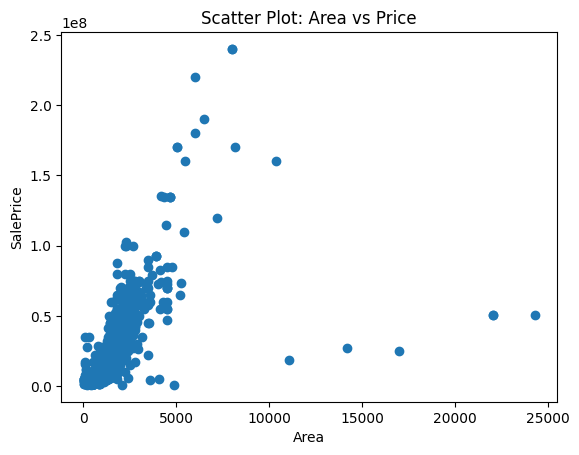

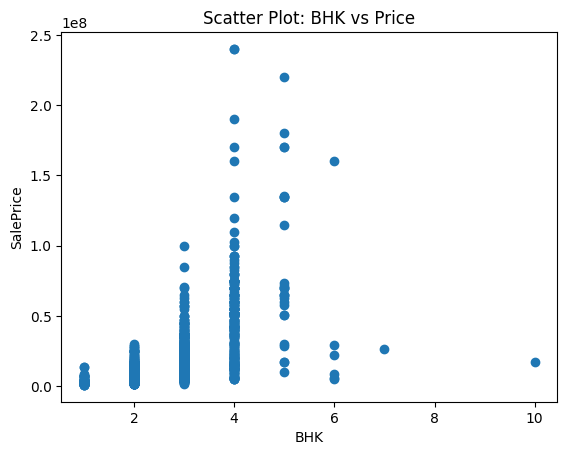

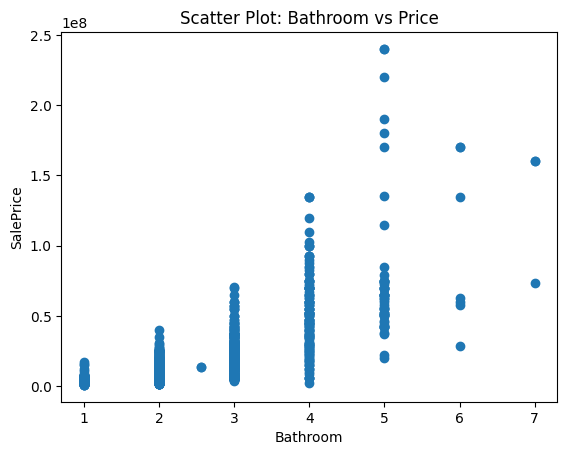

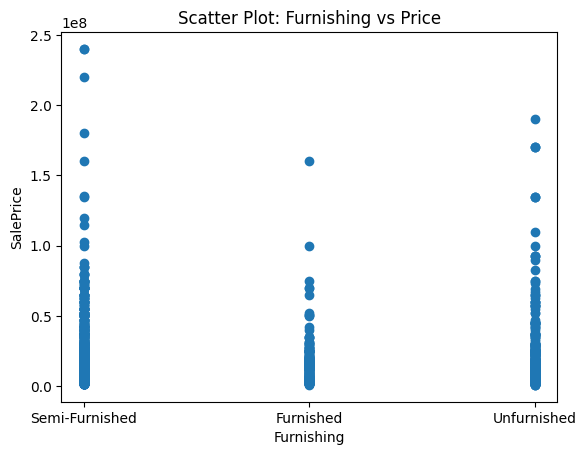

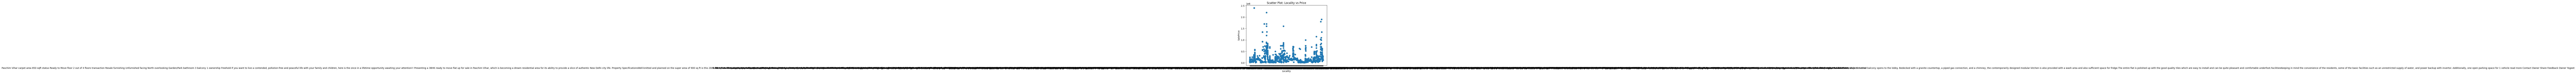

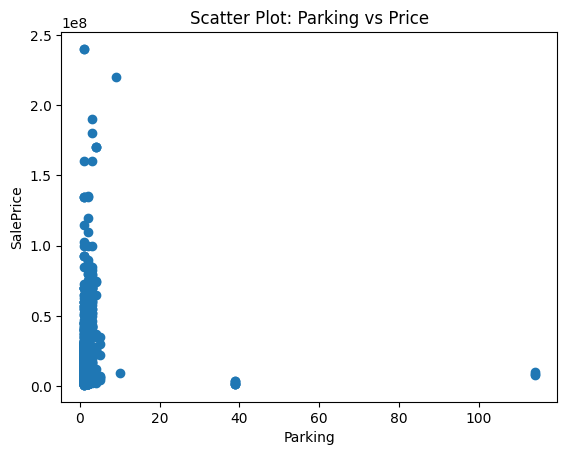

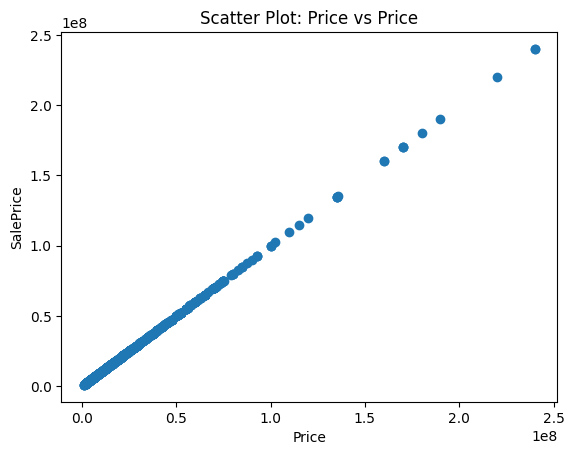

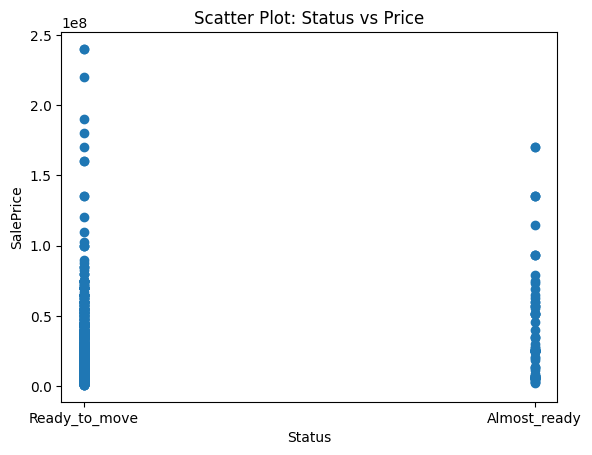

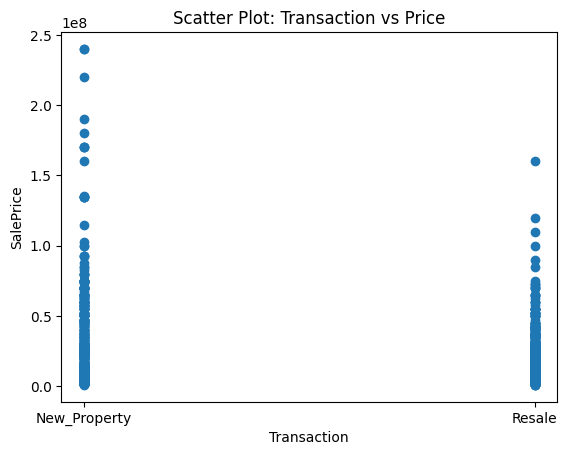

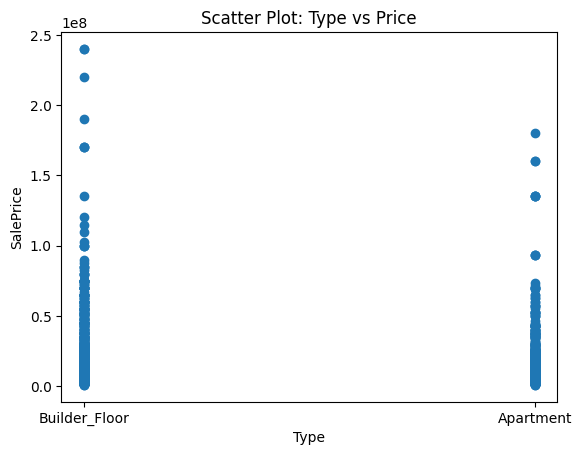

In [13]:
import matplotlib.pyplot as plt

# Plot scatter plots for numerical variables
for variable in dataset.columns:
    plt.scatter(dataset[variable], dataset['Price'])
    plt.xlabel(variable)
    plt.ylabel('SalePrice')
    plt.title(f'Scatter Plot: {variable} vs Price')
    plt.show()

In [14]:

# Define the numerical variables for outlier detection
numerical_variables = ['Area', 'BHK', 'Bathroom', 'Parking', 'Price']

# Calculate z-scores for numerical variables
z_scores = np.abs((dataset[numerical_variables] - dataset[numerical_variables].mean()) / dataset[numerical_variables].std())

# Define the threshold for identifying outliers (e.g., z-score greater than 3)
threshold = 10

# Create a mask for outlier detection
outlier_mask = (z_scores > threshold).any(axis=1)

# Remove outliers from the dataset
data_cleaned = dataset.loc[~outlier_mask]

In [15]:
dataset = data_cleaned
for i in dataset.columns:
    print('{} = {}'.format(i, dataset[i].isnull().sum()))

Area = 0
BHK = 0
Bathroom = 0
Furnishing = 0
Locality = 0
Parking = 0
Price = 0
Status = 0
Transaction = 0
Type = 0


In [16]:
# Find the count of each price
price_counts = dataset['Price'].value_counts()

# Get the prices occurring less than 5 times
price_less_than_10 = price_counts[price_counts < 15].index

# Convert the index to a column
price_less_than_10 = pd.DataFrame(price_less_than_10, columns=['Price'])

# Reset the index of the DataFrame
price_less_than_10.reset_index(drop=True, inplace=True)

# Filter the data to remove rows with the specified prices
data_filtered = dataset[~dataset['Price'].isin(price_less_than_10['Price'])].copy()
dataset = data_filtered

In [17]:
lower_bound = 0
upper_bound = 6000

# Filter the data to keep values within the specified range
data_filtered = dataset[(dataset['Area'] >= lower_bound) & (dataset['Area'] <= upper_bound)].copy()
dataset = data_filtered

In [18]:
# Filter the data to keep values within the specified range
bhk_counts = dataset['BHK'].value_counts()

# Get the BHK categories occurring less than 10 times
bhk_less_than_10 = bhk_counts[bhk_counts < 10].index

bhk_less_than_10 = pd.DataFrame(bhk_less_than_10, columns=['BHK'])

bhk_less_than_10.reset_index(drop=True, inplace=True)

# Filter the data to remove rows with the specified BHK categories
data_filtered = dataset[~dataset['BHK'].isin(bhk_less_than_10['BHK'])].copy()
dataset = data_filtered

In [19]:
dataset['BHK'].value_counts()

3    201
2    109
4     30
1     20
Name: BHK, dtype: int64

In [20]:
dataset['Bathroom'].value_counts()

2.000000    174
3.000000    136
1.000000     30
4.000000     17
2.556086      2
5.000000      1
Name: Bathroom, dtype: int64

In [21]:
bathroom_counts = dataset['Bathroom'].value_counts()

# Get the bathroom counts occurring less than 10 times
bathroom_less_than_10 = bathroom_counts[bathroom_counts < 10].index

# Filter the data to remove rows with the specified bathroom counts
data_filtered = dataset.groupby('Bathroom').filter(lambda x: len(x) >= 10)
dataset = data_filtered

In [22]:
dataset['Bathroom'].value_counts()

2.0    174
3.0    136
1.0     30
4.0     17
Name: Bathroom, dtype: int64

In [23]:
dataset['Price'].value_counts()

15000000    30
30000000    20
25000000    20
20000000    19
6000000     19
7000000     19
6500000     18
5500000     18
4500000     18
12500000    18
3500000     17
22500000    16
5000000     16
26000000    16
19000000    16
3000000     16
21000000    16
13500000    15
12000000    15
15500000    15
Name: Price, dtype: int64

In [24]:
dataset = dataset[dataset['Parking'] != 39]

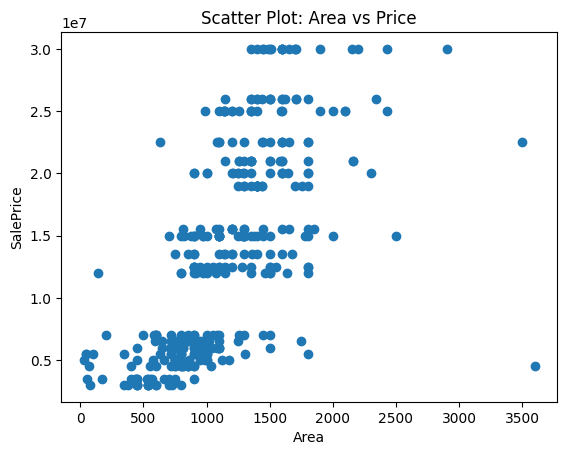

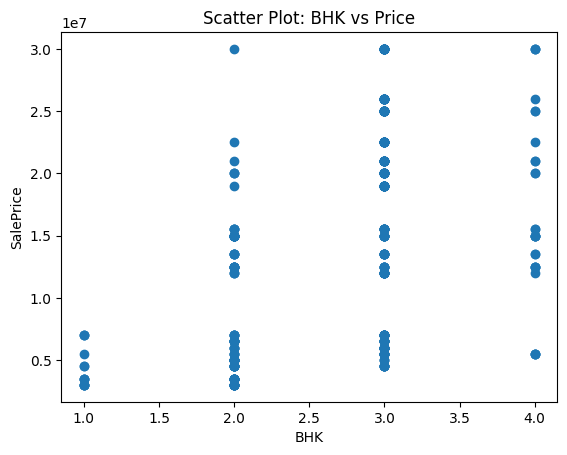

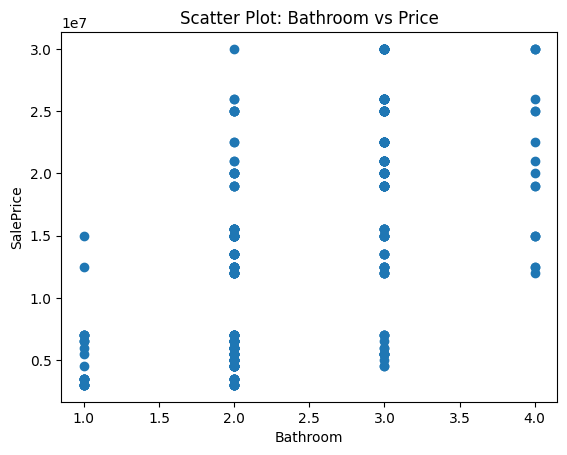

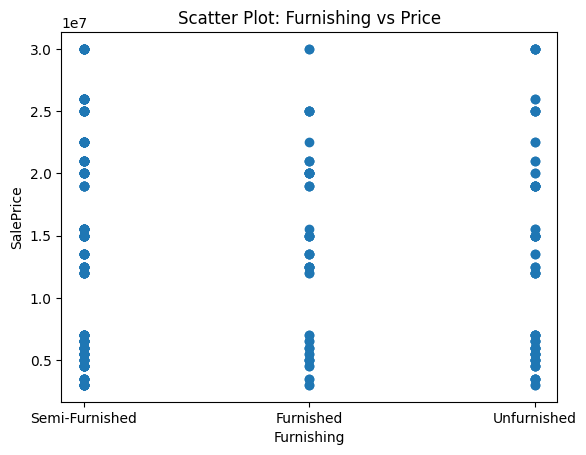

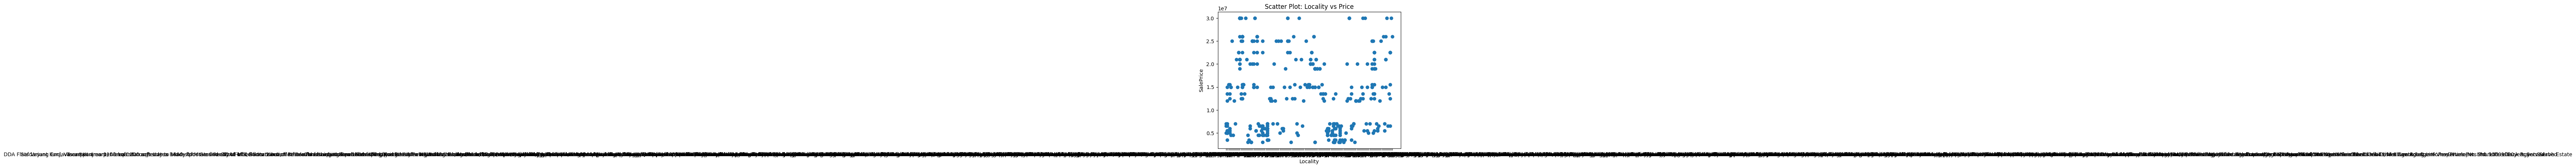

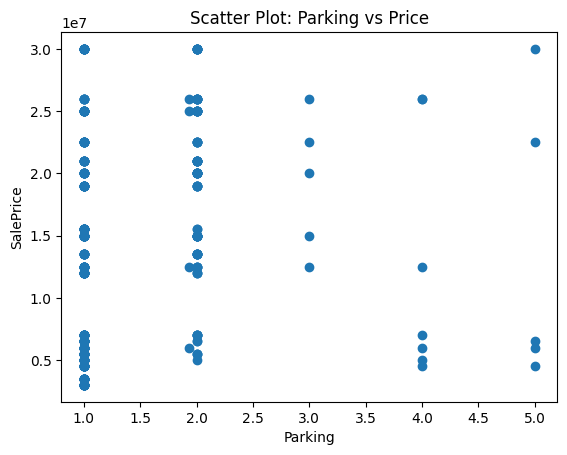

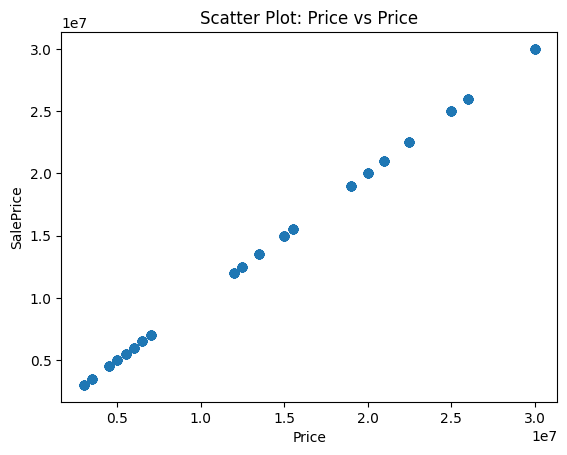

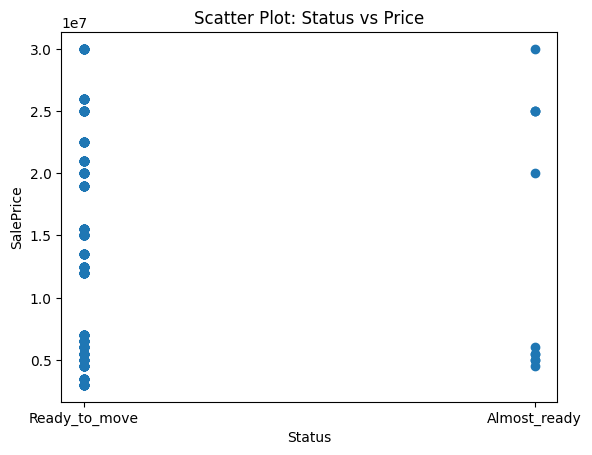

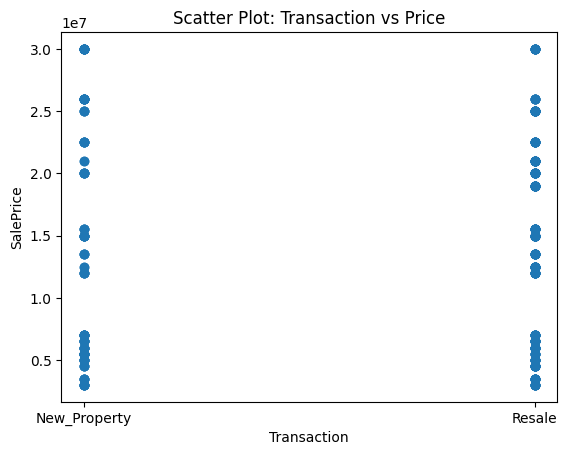

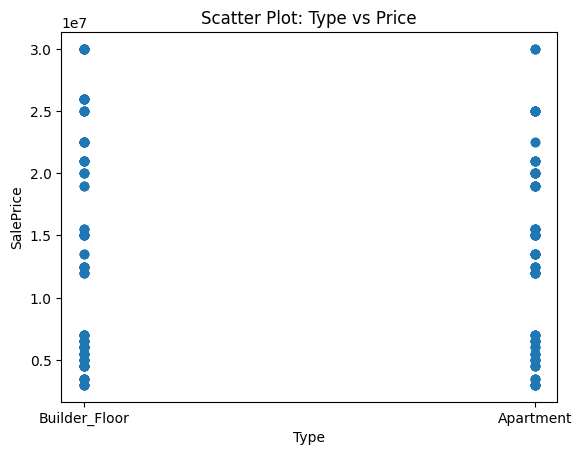

In [25]:
import matplotlib.pyplot as plt

# Plot scatter plots for numerical variables
for variable in dataset.columns:
    plt.scatter(dataset[variable], dataset['Price'])
    plt.xlabel(variable)
    plt.ylabel('SalePrice')
    plt.title(f'Scatter Plot: {variable} vs Price')
    plt.show()


In [26]:
# Calculate the frequency of each parameter in the 'locality' label
locality_frequency = dataset['Locality'].value_counts()

# Display the frequency of each parameter
print(locality_frequency)

Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [27]:
# Get the unique values in the 'Locality' column
locality_unique_values = dataset['Locality'].unique()

# Display the unique values
len(locality_frequency)

147

In [28]:
# Remove leading and trailing whitespaces from the 'Locality' column
d = dataset.copy()
d['Locality'] = d['Locality'].apply(lambda x: x.strip())
location_count = dataset['Locality'].value_counts()

In [29]:
loc_count_less_10 = location_count[location_count <= 10]
loc_count_less_10

Yamuna Vihar, Shahdara                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [30]:
d['Locality'] = d['Locality'].apply(lambda x : 'other' if x in loc_count_less_10 else x)

In [31]:
# Get the unique values in the 'Locality' column
d['Locality'].value_counts

<bound method IndexOpsMixin.value_counts of 0                                        other
1       J R Designers Floors, Rohini Sector 24
2                                        other
5                                        other
9                                        other
                         ...                  
1242                                     other
1248                                     other
1251                                     other
1252                                     other
1255                                     other
Name: Locality, Length: 354, dtype: object>

In [32]:
d['Locality'].value_counts()

other                                     289
Lajpat Nagar 3                             14
J R Designers Floors, Rohini Sector 24     13
Lajpat Nagar 2                             13
Sheikh Sarai Phase 1                       13
Laxmi Nagar                                12
Name: Locality, dtype: int64

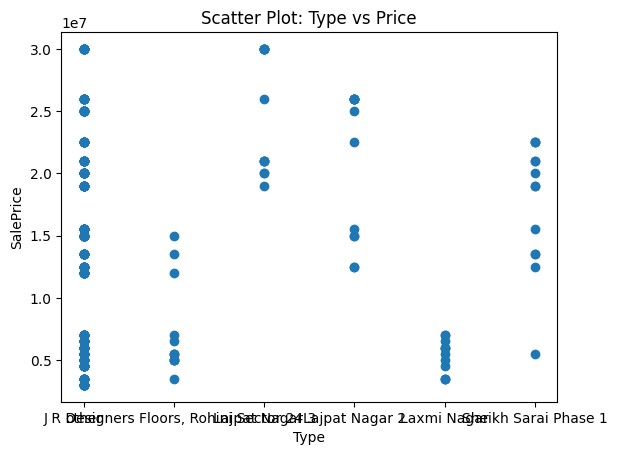

In [33]:
plt.scatter(d['Locality'], d['Price'])
plt.xlabel(variable)
plt.ylabel('SalePrice')
plt.title(f'Scatter Plot: {variable} vs Price')
plt.show()

In [34]:
dataset = d

In [35]:
for i in dataset.columns:
    print("{} : {}".format(i, len(dataset[i].unique())))

Area : 117
BHK : 4
Bathroom : 4
Furnishing : 3
Locality : 6
Parking : 6
Price : 20
Status : 2
Transaction : 2
Type : 2


In [36]:
for i in dataset.columns:
    print(i)

Area
BHK
Bathroom
Furnishing
Locality
Parking
Price
Status
Transaction
Type


In [37]:
dataset.describe()

,Area,BHK,Bathroom,Parking,Price
count,354.000000,354.000000,354.000000,354.000000,3.540000e+02
mean,1158.913119,2.689266,2.403955,1.397577,1.386299e+07
std,496.106493,0.681232,0.700535,0.746181,8.224644e+06
min,28.000000,1.000000,1.000000,1.000000,3.000000e+06
25%,810.000000,2.000000,2.000000,1.000000,6.000000e+06
50%,1112.500000,3.000000,2.000000,1.000000,1.350000e+07
75%,1450.000000,3.000000,3.000000,2.000000,2.000000e+07
max,3600.000000,4.000000,4.000000,5.000000,3.000000e+07


In [38]:
(dataset['Area']/dataset['BHK']).describe()

count     354.000000
mean      429.794051
std       150.898567
min        11.250000
25%       341.250000
50%       433.333333
75%       500.000000
max      1800.000000
dtype: float64

In [39]:
dataset = dataset[((dataset['Area']/dataset['BHK']) >= 300)]
dataset.describe()

,Area,BHK,Bathroom,Parking,Price
count,303.000000,303.000000,303.000000,303.000000,3.030000e+02
mean,1260.307460,2.716172,2.495050,1.448207,1.519142e+07
std,451.902048,0.674980,0.685089,0.786383,8.047438e+06
min,345.000000,1.000000,1.000000,1.000000,3.000000e+06
25%,950.000000,2.000000,2.000000,1.000000,6.500000e+06
50%,1250.000000,3.000000,2.000000,1.000000,1.500000e+07
75%,1500.000000,3.000000,3.000000,2.000000,2.100000e+07
max,3600.000000,4.000000,4.000000,5.000000,3.000000e+07


In [40]:
dataset.shape

(303, 10)

In [41]:
for i in dataset['Locality']:
    i.replace(" ", "_")

In [42]:
dataset.to_csv("firstclean.csv")

In [43]:
x = dataset.drop(columns= ['Price'])

y = dataset['Price']

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2 , random_state= 0)

In [46]:
print( x_train.shape)
print(x_test.shape)

(242, 9)
(61, 9)


In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 1255
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         303 non-null    float64
 1   BHK          303 non-null    int64  
 2   Bathroom     303 non-null    float64
 3   Furnishing   303 non-null    object 
 4   Locality     303 non-null    object 
 5   Parking      303 non-null    float64
 6   Price        303 non-null    int64  
 7   Status       303 non-null    object 
 8   Transaction  303 non-null    object 
 9   Type         303 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 26.0+ KB


In [50]:
col_trans = make_column_transformer((OneHotEncoder(sparse_output= False),['Locality','Furnishing','Status','Transaction','Type']), remainder= 'passthrough')


In [51]:
scaler = StandardScaler()

In [52]:
lr = LinearRegression(n_jobs =True)

In [53]:
pipe = make_pipeline(col_trans,scaler,lr)

In [54]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['Locality', 'Furnishing',
                                                   'Status', 'Transaction',
                                                   'Type'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(n_jobs=True))])

In [55]:
y_pre_lr = pipe.predict(x_test)

In [56]:
r2_score(y_test,y_pre_lr)

0.4385314261843001

In [57]:
import pickle

pickle.dump(pipe , open('LrModle.pkl','wb'))

In [58]:
lasso = Lasso(max_iter= 10000,alpha= 0.1)

In [59]:
pipe = make_pipeline(col_trans,scaler,lasso)

In [60]:
pipe.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.149e+14, tolerance: 1.580e+12
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['Locality', 'Furnishing',
                                                   'Status', 'Transaction',
                                                   'Type'])])),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.1, max_iter=10000))])

In [61]:
y_pre_lasso = pipe.predict(x_test)
r2_score(y_test , y_pre_lasso)

0.46013946848786536

In [62]:
ridge = Ridge()

In [63]:
pipe = make_pipeline(col_trans,scaler,ridge)

In [64]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['Locality', 'Furnishing',
                                                   'Status', 'Transaction',
                                                   'Type'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [65]:
y_pre_ridge = pipe.predict(x_test)
r2_score(y_test , y_pre_ridge)

0.4598903958799754